# 1. 데이터 호출 & Preprocessing

In [2]:
from tqdm.notebook import tqdm_notebook
import os
import pandas as pd
from datetime import datetime

In [8]:
# 기본 저장 주소
ROOT_PATH ="./Topic_Modeling/"
# 데이터 저장 주소
DATA_FOLDER_PATH = os.path.join(ROOT_PATH,"1.Data/")


df_fifa_nexon=pd.read_excel(DATA_FOLDER_PATH +"df_fifa.xlsx", index_col=0)
df_fifa_inven=pd.read_excel(DATA_FOLDER_PATH + "df_fifa_inven.xlsx", index_col=0)

In [9]:
df_fifa_nexon

,day,title,content,view,hit
0,2021-09-09,뇌없고 무능한 개발진들아 ~ 욕안했다 글삭제하지마라,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이게 게임이냐?ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ패스는 했다하면 ...,154,4
1,2021-09-09,피파에 현질하기 vs 롤에 현질하기,ㅇㅇ?,276,0
2,2021-09-09,얘들아 지금 현질 유도 기간이다,체감 개 그지같은거 일부러 현질하게 만드는거니까 참고하자 얘들아개 ㅈ망 그래픽 쪼가...,235,1
3,2021-09-09,도G드래곤-무전,도G드래곤-무전,316,0
4,2021-09-09,개 ㅈ망게임 공이 키퍼를 그냥 지나감?,아주그냥 캐**는거에만 눈이 빨갛지?,184,4
...,...,...,...,...,...
13355,2019-06-07,체감 구리다는 애들 잘들어라,현질하셈 자본주의 사회에서 뭘 더바라냐ㅉㅉ 투자도 안하고 꼭 체감만 구리다고 징징대...,"1,607",5
13356,2019-06-07,님들 근데 왜 팀들이 다 똑같아요?,선수카드는 몇백장인거같은데 쓰는선수는 다 똑같네.. 굴리트 앙리 호나우두.. 호날두...,"1,528",4
13357,2019-06-07,12시 땡하자마자 팅겨버렸네...,신데렐라가 이런 기분인가?,946,4
13358,2019-06-06,인생강화 6천으로 개꿀,2칸의기적,"1,790",5


In [10]:
df_fifa_inven=df_fifa_inven.iloc[:,:5]

In [11]:
df_fifa_inven

,day,title,content,view,hit
0,2021-09-11,겜 렉이 갑자기 엄청 심한데,업댓하고 나서 2판정도 이주 스무스하게 잘 돌아갔었는데 3판째 끝나고 갑자기 이적시...,36,0
1,2021-09-11,5백 2볼란치 는 비매너다?,친선에서 이런 채팅을 하시는 분이 있어서 한번 이야기 해보고 싶네요.해당 경기 내용...,161,0
2,2021-09-11,패키지 추천,9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데 어떤게...,79,0
3,2021-09-11,20A 메시 로패하면 오버롤 오르나요?,20A 메시 은카 갖고있습니다. 로스터패치하면 오버롤 오르나요?,69,0
4,2021-09-11,알파,19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,100,0
...,...,...,...,...,...
8497,2018-09-25,만약에 모드리치가 발롱받으면,토티 모드리치가 제일 좋아져야 하는거라고 생각하는데 어떤가요?발롱이면 진짜 최고의 ...,2714,2
8498,2018-09-25,게임중 채팅차단은 상대가 차단하면 같이 안되게 하면 됩니다.,인벤에도 메인에 올라왔네요?피파온라인3 에서 1:1 2:2 3:3에서게임이긴사람이든...,1523,0
8499,2018-09-25,추석버닝 추천,이렇게 떳는데 뭐받죠??,2734,0
8500,2018-09-25,"**전술, 포메관련 토론합시다**",두달간 전술수치랑 포메 관련해서 여러가지 시험해봤지만 명확한 답을 내리지 못하고 있...,2724,0


### 두 개의 크롤링 데이터 결합

In [12]:
df_fifa_merge=pd.concat([df_fifa,df_fifa_inven]).reset_index(drop=True).sort_values(by=['day'], ascending=False)

In [13]:
df_fifa_merge

,day,title,content,view,hit
13361,2021-09-11,5백 2볼란치 는 비매너다?,친선에서 이런 채팅을 하시는 분이 있어서 한번 이야기 해보고 싶네요.해당 경기 내용...,161,0
13362,2021-09-11,패키지 추천,9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데 어떤게...,79,0
13363,2021-09-11,20A 메시 로패하면 오버롤 오르나요?,20A 메시 은카 갖고있습니다. 로스터패치하면 오버롤 오르나요?,69,0
13364,2021-09-11,알파,19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,100,0
13365,2021-09-11,ebs 로랑 코시엘니 은카,얼마나 더 오를까요 ..??,309,0
...,...,...,...,...,...
21857,2018-09-25,만약에 모드리치가 발롱받으면,토티 모드리치가 제일 좋아져야 하는거라고 생각하는데 어떤가요?발롱이면 진짜 최고의 ...,2714,2
21858,2018-09-25,게임중 채팅차단은 상대가 차단하면 같이 안되게 하면 됩니다.,인벤에도 메인에 올라왔네요?피파온라인3 에서 1:1 2:2 3:3에서게임이긴사람이든...,1523,0
21859,2018-09-25,추석버닝 추천,이렇게 떳는데 뭐받죠??,2734,0
21860,2018-09-25,"**전술, 포메관련 토론합시다**",두달간 전술수치랑 포메 관련해서 여러가지 시험해봤지만 명확한 답을 내리지 못하고 있...,2724,0


### 날짜 형식으로 변환 및 수집 기간 설정

In [32]:
for i in range(len(df_fifa_merge)):
    df_fifa_merge['day'][i]=datetime.strptime(df_fifa_merge['day'][i], "%Y-%m-%d")

C:\Users\user\Anaconda3\envs\sumin\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [351]:
df_fifa_days=df_fifa_merge[df_fifa_merge['day'] >= datetime.strptime('2020-01-01', "%Y-%m-%d")].reset_index(drop=True)

In [352]:
df_fifa_days

,day,title,content,view,hit
0,2021-09-11 00:00:00,5백 2볼란치 는 비매너다?,친선에서 이런 채팅을 하시는 분이 있어서 한번 이야기 해보고 싶네요.해당 경기 내용...,161,0
1,2021-09-11 00:00:00,패키지 추천,9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데 어떤게...,79,0
2,2021-09-11 00:00:00,20A 메시 로패하면 오버롤 오르나요?,20A 메시 은카 갖고있습니다. 로스터패치하면 오버롤 오르나요?,69,0
3,2021-09-11 00:00:00,알파,19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?,100,0
4,2021-09-11 00:00:00,ebs 로랑 코시엘니 은카,얼마나 더 오를까요 ..??,309,0
...,...,...,...,...,...
17227,2020-01-01 00:00:00,강화확률,강화확률 0.1이냐 ** 2카에서 3카 풀이 터지네 개 **,160,1
17228,2020-01-01 00:00:00,지금 토티 시즌 사도 될까요,"지금 사도 될까요?사게 되면 메시,날두, 라모스 정도일 것 같아요그리고 셋다 가격 ...",1756,0
17229,2020-01-01 00:00:00,토트넘 티비금카팀 선수고민중 입니다,모두 아시겠지만 티비금카가 많이 풀렸어요티비금카중 토트넘스쿼드가 가성비가 좋아서 토...,"2,074",3
17230,2020-01-01 00:00:00,아래 ICON 개봉 결과다..,썩을 발데라마나 렐러스 안나온걸 다행으로 알아야하나?드로그바나 지단 바랬는데..썩을...,"6,051",0


### 제목 내용 연결

In [353]:
df_fifa_days['title_body']=df_fifa_days['title'].map(str) + " " + df_fifa_days['content'].map(str)

In [355]:
df_fifa_days[['day','title_body']]

,day,title_body
0,2021-09-11 00:00:00,5백 2볼란치 는 비매너다? 친선에서 이런 채팅을 하시는 분이 있어서 한번 이야기 ...
1,2021-09-11 00:00:00,패키지 추천 9000fc로추석 풍년 + 별토끼 3개추석 연쇄 패키지 2개중에 구매하...
2,2021-09-11 00:00:00,20A 메시 로패하면 오버롤 오르나요? 20A 메시 은카 갖고있습니다. 로스터패치하...
3,2021-09-11 00:00:00,알파 19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠?
4,2021-09-11 00:00:00,ebs 로랑 코시엘니 은카 얼마나 더 오를까요 ..??
...,...,...
17227,2020-01-01 00:00:00,강화확률 강화확률 0.1이냐 ** 2카에서 3카 풀이 터지네 개 **
17228,2020-01-01 00:00:00,"지금 토티 시즌 사도 될까요 지금 사도 될까요?사게 되면 메시,날두, 라모스 정도일..."
17229,2020-01-01 00:00:00,토트넘 티비금카팀 선수고민중 입니다 모두 아시겠지만 티비금카가 많이 풀렸어요티비금카...
17230,2020-01-01 00:00:00,아래 ICON 개봉 결과다.. 썩을 발데라마나 렐러스 안나온걸 다행으로 알아야하나?...


### 분석에 불필요한 데이터 제거 

In [356]:
# 새로운 리스트
import re
text_pre = []

for txt in df_fifa_days['title_body']:
    text = re.sub('[^가-힣0-9]',' ',txt)
    text = re.sub('\s+',' ', text)
    text_pre.append(text)

In [357]:
df_fifa_days['text_pre']=text_pre

In [361]:
df_fifa_days[['day','text_pre']]

,day,text_pre
0,2021-09-11 00:00:00,5백 2볼란치 는 비매너다 친선에서 이런 채팅을 하시는 분이 있어서 한번 이야기 해...
1,2021-09-11 00:00:00,패키지 추천 9000 로추석 풍년 별토끼 3개추석 연쇄 패키지 2개중에 구매하려는데...
2,2021-09-11 00:00:00,20 메시 로패하면 오버롤 오르나요 20 메시 은카 갖고있습니다 로스터패치하면 오버...
3,2021-09-11 00:00:00,알파 19시즌 잉글랜드 풀백 금카 있는데 알파 당연히 불가능이겠죠
4,2021-09-11 00:00:00,로랑 코시엘니 은카 얼마나 더 오를까요
...,...,...
17227,2020-01-01 00:00:00,강화확률 강화확률 0 1이냐 2카에서 3카 풀이 터지네 개
17228,2020-01-01 00:00:00,지금 토티 시즌 사도 될까요 지금 사도 될까요 사게 되면 메시 날두 라모스 정도일 ...
17229,2020-01-01 00:00:00,토트넘 티비금카팀 선수고민중 입니다 모두 아시겠지만 티비금카가 많이 풀렸어요티비금카...
17230,2020-01-01 00:00:00,아래 개봉 결과다 썩을 발데라마나 렐러스 안나온걸 다행으로 알아야하나 드로그바나 지...


# 2) L-Tokenizer 학습

In [85]:
from soynlp.word import WordExtractor

#corpus_fname = "c:/data/naver_news전처리완료.txt"
model_fname = "./fifa_soynlp.model"

#sentences = [sent.strip() for sent in open (corpus_fname, 'r', encoding = 'UTF-8').readlines()]

word_extractor = WordExtractor(min_frequency = 100, min_cohesion_forward = 0.05, min_right_branching_entropy = 0.5)
word_extractor.train(text_pre)
word_extractor.save(model_fname)

training was done. used memory 0.498 Gbory 0.304 Gb


In [86]:
#LTokenizer 모델 적용
import math
from soynlp.tokenizer import LTokenizer

word_extractor = WordExtractor(min_frequency = 100, min_cohesion_forward = 0.05, min_right_branching_entropy = 10)
word_extractor.load(model_fname)

scores = word_extractor.word_scores()
scores = {key:(scores[key].cohesion_forward * math.exp(scores[key].right_branching_entropy)) for key in scores.keys()}
tokenizer = LTokenizer(scores=scores)
tokens = tokenizer.tokenize(text_pre[0])

print(tokens)

all cohesion probabilities was computed. # words = 1837
all branching entropies was computed # words = 55784
all accessor variety was computed # words = 55784
['5백', '2볼란치', '는', '비매너', '다', '친선', '에서', '이런', '채팅', '을', '하시', '는', '분이', '있어서', '한번', '이야기', '해보', '고', '싶네요', '해당', '경기', '내용', '포메이션']


In [87]:
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(text_pre) # list of str like


used default noun predictor; Sejong corpus based logistic predictor
C:/Users/user/Anaconda3/envs/sumin/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (304874, 180201, 145825)
predicting noun score was done                                        
before postprocessing 45403
_noun_scores_ 10155
checking hardrules ... done0 / 10155+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 6232
extracted 298 compounds from eojeolss ... 9000 / 9429

In [364]:
nouns_list

['고민입니다',
 '실축존재',
 '매출상승가능성',
 '특수시즌',
 '레알첼시',
 '은카성공',
 '언제나옴',
 '질문합니다',
 '쿠폰입니다',
 '소모됩니다',
 '팀평부탁드립니다',
 '회사입니다',
 '1차쿠폰',
 '1억따리',
 '1920',
 '추가점검',
 '출시합니다',
 '피파형님들',
 '존경합니다',
 '생각중입니다',
 '지방충들',
 '시즌카를',
 '사랑해주신',
 '전술입니다',
 '보강할지',
 '근본맨유',
 '패스인지',
 '완벽정리',
 '농협8카',
 '7억짜리',
 '보정받아서',
 '수준입니다',
 '이유입니다',
 '진행됩니다',
 '부분부분',
 '정도입니다',
 '강화할때',
 '쿠폰알림',
 '인정합니다',
 '아이콘카드',
 '호돈5카',
 '사랑합니다',
 '상관없습니다',
 '20억짜리',
 '동의합니다',
 '비슷합니다',
 '될것입니다',
 '보상관련',
 '씁쓸합니다',
 '요청합니다',
 '오랜기간',
 '여론조사',
 '행복합니다',
 '의견입니다',
 '유리합니다',
 '진행상황',
 '비교실축',
 '패스합니다',
 '4차쿠폰',
 '볼타라이브',
 '6차쿠폰',
 '점심메뉴',
 '필요합니다',
 '팩트입니다',
 '사양체크',
 '추천드립니다',
 '개돼지입니다',
 '전체저장',
 '확인됩니다',
 '특이사항',
 '주작온라인4',
 '질문드립니다',
 '모두모두',
 '하루빨리',
 '버그있음',
 '잠금해제',
 '참여할수',
 '하나도없음',
 '중간중간',
 '간단합니다',
 '버그있네요',
 '때문인지',
 '동일합니다',
 '이것저것',
 '빨리빨리',
 '세계최강',
 '보정인지',
 '조작인지',
 '따름입니다',
 '하트입니다',
 '선수들끼리',
 '진짜진짜',
 '건의드립니다',
 '선수끼리',
 '상술입니다',
 '이득입니다',
 '확률주작',
 '없음근데',
 '시즌카가',
 '게임인지',
 '유저끼리',
 '3000포인트',
 '운영하지말자',
 '죄없는유

In [88]:
#from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

#corpus_path = '2016-10-20-news'
#sents = DoublespaceLineCorpus(corpus_path, iter_sent=True)

noun_extractor = LRNounExtractor_v2(verbose=True)
nouns_v2 = noun_extractor.train_extract(text_pre)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 145871 from 17232 sents. mem=0.560 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=494920, mem=0.679 Gb
[Noun Extractor] batch prediction was completed for 43847 words
[Noun Extractor] checked compounds. discovered 29497 compounds
[Noun Extractor] postprocessing detaching_features : 37173 -> 27493
[Noun Extractor] postprocessing ignore_features : 27493 -> 27258
[Noun Extractor] postprocessing ignore_NJ : 27258 -> 26770
[Noun Extractor] 26770 nouns (29497 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.753 Gb                    
[Noun Extractor] 68.45 % eojeols are covered


In [366]:
nouns_list_v2

['일렉트로닉아츠코리아',
 '아틀레티코마드리드',
 '3000마일리지',
 '월드클래스문지기',
 '닌텐도스위치엔진',
 '문애란의뮤직서핑',
 '6차넥스트필드전',
 '피파하는월급루팡',
 '패드립과섹드립등',
 '위닝일레븐10',
 '생각했지만이번',
 '게임시작하기전',
 '축구온라인게임',
 '스몰럭키선수팩',
 '리즈유나이티드',
 '초보유저입니다',
 '4210301',
 '해드리겠습니다',
 '라이브퍼포먼스',
 '피파온라인3때',
 '6차넥스트필드',
 '게임플레이에대',
 '로스터업데이트',
 '이브라히모비치',
 '1차테스트서버',
 '크루이프를구매',
 '묀헨글라트바흐',
 '아이콘크루이프',
 '다롄프로축구단',
 '넥슨관계자분들',
 '확률제어시스템',
 '피파4모바일앱',
 '좋아하시는분들',
 '따라잡히는거',
 '프로게이머들',
 '유로2020',
 '박정무실장님',
 '플레이스타일',
 '신규유저보상',
 '음바페쓰는법',
 '코나미이펙트',
 '피파2020',
 '19챔스시즌',
 '무과금유저들',
 '플레이메이커',
 '피파온라인4',
 '프로게이머분',
 '미니페이스온',
 '10000원',
 '피시방이벤트',
 '생각하시는분',
 '위닝2021',
 '비주류선수들',
 '50000원',
 '12000원',
 '자동수비때문',
 '네트워크에러',
 '소비자보호법',
 '3000만원',
 '레알마드리드',
 '제일비싼가격',
 '25000원',
 '피파온라인3',
 '굴리트온라인',
 '피파불매운동',
 '패널티박스안',
 '11시59분',
 '피지컬온라인',
 '부족하기때문',
 '1000레벨',
 '하프스페이스',
 '가장느린선수',
 '12시30분',
 '시세조작매물',
 '헤비현질러들',
 '인플루언서들',
 '복귀유저보상',
 '18새들아형',
 '게임운영능력',
 '적어봤습니다',
 '키보드유저들',
 '오르락내리락',
 '1500만원',
 '볼돌하는사람',
 '진격의거신팀',
 '200억구단',
 '부드러운체감'

In [108]:
#nouns_list_v2=list(nouns_v2.keys())
#nouns_list=list(nouns.keys())
nouns_all=nouns_list + nouns_list_v2
nouns_all=list(set(nouns_all))
len(nouns_all)

27687

In [91]:
import re 
from soynlp.hangle import compose, decompose, character_is_korean

doublespace_pattern = re.compile('\s+')

def jamo_sentence(sent): 
  def transform(char): 
    if char == ' ': 
      return char 
    cjj = decompose(char) 
    if len(cjj) == 1: 
      return cjj 
    cjj_ = ''.join(c if c != ' ' else '-' for c in cjj) 
    return cjj_
#sent_ = ''.join(transform(char) for char in sent)
  sent_ =''
  for char in sent: 
    if character_is_korean(char) or char== ' ': 
      sent_ += ''.join(transform(char))
    elif character_is_korean(char) == False:
       sent_ += ''.join(' ')
  sent_ = doublespace_pattern.sub(' ', ''.join(sent_))
  return sent_

In [92]:
last_word=[]
for i in range(len(nouns_all)):
    tmp=jamo_sentence(nouns_all[i])
    if tmp[-1]=="-":
        last_word.append('T')
    else:
        last_word.append('F')

In [93]:
soy_fifa = pd.DataFrame()
soy_fifa['nouns']=nouns_all
soy_fifa['lastword']=last_word

### 메캅 사용자 사전에 적용 형태로 변환

In [94]:
soy_fifa

,nouns,lastword
0,상대편먼저,T
1,하는데패치할수,T
2,발생함골대,T
3,호날두아가리,T
4,출시준비,T
...,...,...
27682,타케터라고,T
27683,트라이,T
27684,되어있음표기,T
27685,메타개인,F


In [98]:
soy_fifa.to_excel(DATA_FOLDER_PATH+"soy_fifa.xlsx")

# 3) mecab 사용자 사전 추가 & Tokenizer 실행 

In [128]:
from konlpy.tag import Mecab 
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [168]:
save_words=['팀','렉','돈','공','키','골','욕','겜','슛','핑','볼','핫']

In [174]:
token_text=[]
for text in text_pre:
    tmp=[]
    p_tokens=mecab.nouns(text)
    for p in p_tokens:
        if len(p) > 1:
            tmp.append(p)
            
        elif p in save_words:
            tmp.append(p)
            
    token_text.append(tmp)

In [367]:
token_text

[['5백', '2볼란치', '비매너', '친선', '채팅', '이야기', '해당', '경기', '내용', '포메이션'],
 ['패키지', '추천', '9000', '로추', '풍년', '토끼', '3개추석', '연쇄', '패키지', '구매'],
 ['20', '메시', '로패', '오버', '메시', '은카', '로스터패치', '오버'],
 ['알파', '19시즌', '잉글랜드', '풀백', '금카', '알파', '가능'],
 ['로랑', '코시엘니', '은카'],
 ['컨뽕', '컨뽕'],
 ['겜',
  '렉',
  '2판',
  '정도',
  '3판',
  '이적',
  '시장',
  '공경',
  '할때',
  '렉이',
  '진짜',
  '칠정',
  '게임',
  '문제',
  '컴터',
  '문제',
  '컴터',
  '사양',
  '발로',
  '란트',
  '피파',
  '화질',
  '렉',
  '답글',
  '부탁'],
 ['볼타',
  '매칭',
  '혹시',
  '피파',
  '관계자분들',
  '게시판',
  '모니터링',
  '매칭시스템',
  '개선',
  '고객센터',
  '문의',
  '답변',
  '모드',
  '시작'],
 ['요한', '크루이프', '1카', '이거', '고민입니다'],
 ['이번',
  '패키지',
  '창렬',
  '가격',
  '형성',
  '노랑',
  '비교했을때',
  '3배',
  '벌써',
  '하한',
  '매물',
  '보통',
  '몇배'],
 ['이번',
  '시즌',
  '급여',
  '대부분',
  '스쿼드',
  '운영',
  '굴리트',
  '26날두',
  '25지단',
  '25레이카르트',
  '24제라드',
  '24말디니',
  '24저급여',
  '수미',
  '저급여',
  '풀백',
  '저급여',
  '어디',
  '급여',
  '건지',
  '기존',
  '시즌',
  '고강',
  '급여',
  '패치',
  '이상',
  '시간',
  '지나',
  '기존

In [245]:
from collections import Counter
import itertools

token_words=list(itertools.chain(*token_text))
token_words
vocab=Counter(token_words)


In [246]:
len(vocab)
vocab_size=len(vocab)
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장 vocab

In [368]:
vocab

[('게임', 4647),
 ('선수', 4240),
 ('넥슨', 2550),
 ('유저', 2545),
 ('피파', 2416),
 ('팀', 2360),
 ('생각', 2349),
 ('보정', 1891),
 ('시즌', 1808),
 ('사람', 1713),
 ('정도', 1514),
 ('패스', 1499),
 ('문제', 1460),
 ('이거', 1230),
 ('현질', 1208),
 ('체감', 1153),
 ('급여', 1143),
 ('돈', 1122),
 ('추천', 1120),
 ('강화', 1089),
 ('스쿼드', 1086),
 ('이상', 1019),
 ('시간', 947),
 ('보상', 923),
 ('하나', 914),
 ('때문', 909),
 ('이게', 853),
 ('축구', 841),
 ('패치', 838),
 ('상대', 828),
 ('아이콘', 826),
 ('이유', 796),
 ('이번', 789),
 ('가능', 764),
 ('크로스', 759),
 ('공', 758),
 ('경우', 755),
 ('경기', 738),
 ('확률', 730),
 ('중거리', 712),
 ('상황', 710),
 ('가격', 704),
 ('이벤트', 704),
 ('수비', 686),
 ('부탁', 673),
 ('키', 672),
 ('버그', 670),
 ('개선', 656),
 ('골', 644),
 ('피파4', 641),
 ('욕', 625),
 ('시작', 607),
 ('시스템', 602),
 ('우리', 595),
 ('플레이', 583),
 ('인게임', 581),
 ('이건', 575),
 ('서버', 557),
 ('겜', 548),
 ('패키지', 543),
 ('5카', 529),
 ('차이', 527),
 ('평가', 524),
 ('박정무', 513),
 ('운영', 508),
 ('키퍼', 488),
 ('카드', 485),
 ('입니다', 481),
 ('오류', 474),
 ('금카',

In [247]:
vocab[-1]

('미칭', 1)

# 4) BERT 추가 사전 학습을 위한 token ID 구축

In [249]:
vocab_list=[]
for i in range(len(vocab)):
    vocab_list.append(vocab[i][0])


In [340]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

from transformers import AutoTokenizer, AutoModelWithLMHead
model_version = 'beomi/kcbert-base'
tokenizer = AutoTokenizer.from_pretrained(model_version)

In [319]:
# 추가된 단어의 개수 확인
num_added_toks = tokenizer.add_tokens(vocab_list)
num_added_toks


20826

In [321]:
v_ids=[]
for v in vocab_list:
    print(v)
    tokenizer.add_tokens(v)
    print(tokenizer.convert_tokens_to_ids(v))
    v_ids.append(tokenizer.convert_tokens_to_ids(v))

게임
9916
선수
12821
넥슨
30000
유저
30001
피파
30002
팀
3227
생각
7989
보정
30003
시즌
22124
사람
7978
정도
8384
패스
16425
문제
8038
이거
8362
현질
30004
체감
22495
급여
14379
돈
869
추천
11030
강화
11904
스쿼드
30005
이상
8176
시간
8485
보상
10439
하나
8080
때문
8960
이게
8098
축구
14668
패치
30006
상대
9455
아이콘
23282
이유
8284
이번
8175
가능
8545
크로스
30007
공
314
경우
9961
경기
11096
확률
18219
중거리
30008
상황
8377
가격
9286
이벤트
26740
수비
30009
부탁
9562
키
3099
버그
30010
개선
12875
골
307
피파4
30011
욕
2347
시작
8435
시스템
11864
우리
7983
플레이
25132
인게임
30012
이건
8259
서버
23562
겜
273
패키지
30013
5카
30014
차이
13096
평가
11741
박정무
30015
운영
9773
키퍼
30016
카드
11865
입니다
9222
오류
17992
금카
30017
시세
21400
출시
22693
사용
9021
슛
1981
태클
24981
쿠폰
30018
피파온라인4
30019
부분
11515
적용
11101
키보드
21830
은카
30020
점검
28209
가요
30021
여기
8225
능력치
30022
챔스
30023
오버롤
30024
필요
8223
업데이트
30025
겁니다
10310
댓글
8064
추가
11368
내용
9132
굴리트
30026
발생
9878
가치
11441
건데
12011
감사
8848
상대방
14921
구단
30027
답변
12985
이후
10030
진행
10308
지금
8001
드립니다
23295
확인
9342
여러분
10117
라이브
30028
골키퍼
30029
스텟
30030
이해
8226
현상
18118
자체
10736
실력
12022

30746
가즈
30747
신보석
30748
형식
29920
저기
9853
대략
30749
필자
30750
노잼
30751
헤딩골
30752
주변
9055
꼬마
30753
극대
30754
우위
30755
심리
18423
현질러들
30756
색깔
15849
3번
17483
정면
30757
본사
29325
금지
9439
나카타
30758
실질
14185
피망
30759
패마
30760
20노미
30761
베르너
30762
클럽팀
30763
커브
30764
눈팅
30765
재화
30766
순서
21117
대리
14685
순위경기
30767
최강
15069
트롤
30768
감안
30769
이동
14252
보정보정
30770
5성
30771
주사위
30772
나발
14195
출전
30773
증설
30774
리빌딩
30775
버전
30776
감아차기
30777
바껴
27788
처벌
8462
소개
21265
이지랄
19281
백패스
30778
민밸
30779
이놈
9430
10분
26251
글자
30780
선호
24790
5천
11805
건의
30781
전문
9084
통계
10044
아르헨티나
30782
벨기에
30783
이틀
18312
부담
11415
심함
30784
비중
30785
다행
9786
부스터
30786
복귀유저
30787
스킬
30788
변명
10539
첨부
30789
유명
12496
바셀
30790
호돈신
30791
차지
12983
동네
9362
코파
30792
개입
11268
11억
30793
책정
30794
19토츠
30795
의식
12614
치달
30796
형태
24135
신규유저
30797
물타기
9978
수도
9379
수정됩니다
30798
밀리탕
30799
리뷰
30800
노현질
30801
도르트문트
30802
만원
13909
살라
30803
대안
13778
90실축비주류포지션
30804
실축존재
30805
크로스중거리헤딩상향
30806
부류
15330
훈수
30807
산정
30808
스킵
30809
각자
14075
주기
20079
체력
23557

18354
몰빵
21871
해주
9563
고찰
31376
피온시리즈
31377
파고
20595
수지
31378
5만
28203
몇일
15864
노파울
31379
구역
11581
인상
11662
황희
31380
장기
10836
주공시즌
31381
19라이브
31382
이에이코리아
31383
1인
12009
클로제
31384
5000만
31385
3대3
31386
키커
31387
코로나19
12217
2주년
31388
꼼수
11847
유로
31389
인대
31390
긴급점검
31391
득실
15126
3연패
31392
방구석
13737
똥손
31393
형평
16205
공통
15366
1장
31394
애기
12344
썸머
31395
인력
16527
동기
31396
대충
11961
오언
31397
거짓
8192
50만원
22681
상세
31398
실제축구
31399
창신
31400
핫단일
31401
이리
9355
타령
10171
반반
23526
맨체스터
31402
대규모
18886
주구장창
19112
정무쿤
31403
인터밀란
31404
4번
29851
리오넬
31405
이딴식
31406
뤼디거
31407
여태
12042
연봉
11163
넘었는데
31408
104
31409
성인
13246
원상
29157
로딩
31410
말장난
13062
흥민이
31411
버닝이벤트
31412
전반전
31413
연타
31414
중반
31415
승패조작
31416
상단
31417
인겜
31418
한편
17332
구독
18448
오늘부
31419
체감상
31420
트레제게
31421
유저임
31422
미국
8057
컨트롤러
31423
지공
31424
헤딩경합
31425
1패
31426
900
31427
조장
11486
도달
31428
올림픽
10969
2년
9378
카제미루
31429
런칭
31430
피린
31431
강화비용
31432
관점
31433
워커
31434
큰일
10520
원칙
11403
가로채기
31435
우리편
24397
통화
14232
모욕
12574
인신공격
23394

32004
하하하하하하
32005
후멜스
32006
데스
32007
평가부탁
32008
김정민
32009
동점골
32010
재능
26309
우연
25549
오심
32011
보관함
32012
동전
32013
삼성
8527
특이
32014
정발
32015
반대쪽
32016
마네킹
32017
기억상
32018
다수발생
32019
움짤참고
32020
정반대편
32021
신뇌구조
32022
소크라테스
32023
궁금
8828
19억
32024
월레
32025
양반
10738
얼리
32026
존중
12138
플레이메이킹
32027
현대축구
32028
민첩
32029
스탯반영
32030
입문
32031
유효
32032
이정도
9216
실명
15736
복주머니
32033
3만
21419
후원
12864
조르디
32034
티티
32035
설패
32036
팀추천좀
32037
주라
32038
신규복귀
32039
저급
24288
현시점
32040
양팀
32041
평균값
32042
차량
13747
팁게시판
32043
거리두기
20043
180
12476
기존유저들
32044
연말
22751
애착
32045
적패
23654
법무팀
32046
위기
11769
분기
32047
체팅
32048
뱃지
32049
슛각
32050
가격대
32051
사라
8949
1카기준
32052
프로2부
32053
억짜리
32054
서울경기
32055
다비드루이스
32056
단기간
32057
4123
32058
팀성향
32059
경찰
8326
리오
32060
50억이하
32061
이긴적
32062
오다
32063
서울스튜디오
32064
예선
32065
개극혐
32066
비에르
32067
기가
9462
화폐
25582
악성
19911
세이브
32068
부탁드립
32069
서비스종료
32070
제도
13431
소망
32071
5골
32072
우리집
16861
운영진분들
32073
연장전
32074
최우선
18180
소감
32075
초록색
32076
벤치
32077
다롄
32078
스키
32079
20포인트
320

33091
스케
28355
알피지
33092
잠시
14699
할로윈
33093
길드
33094
80분
33095
미페충
33096
갈고
33097
고수님
33098
창모드
33099
귀속거래
33100
추석버닝
33101
고딘
33102
프로3
33103
1카사서
33104
커리어모드
33105
이들
18217
시스탬
33106
라피
33107
오버랩
33108
데파이
33109
꼬우
33110
급료
33111
홍준표
9932
자유자재
33112
러쉬
33113
룰렛
33114
조작매물
33115
브룩
33116
서머비
33117
3억7천
33118
티돈
33119
쌉귀속
33120
판매주문
33121
급여조정
33122
텐센트
33123
영업이익
33124
삼일절
33125
유니폼만들기
33126
로랑
33127
요한
33128
원팀
33129
메가
33130
스나
33131
동국
33132
반속
33133
정렬
33134
끝물
33135
한잔
24507
2때
33136
90대
33137
토악
33138
어드밴티지
33139
옐로우
33140
협회
33141
태클성공
33142
보정론자
33143
3000만원
33144
허세
25266
판권
33145
인게임체감
33146
스케이트
33147
답답
9224
이상태
33148
넥슨놈들
33149
5연승
33150
2000억
33151
희망고문
33152
맥스
33153
피를
17711
견제
13092
서울대
9447
야심
33154
편파
14095
진절머리
33155
침투코치
33156
프리스타일
33157
혼합
33158
재발
19615
경기전
33159
자칭
12781
하나하나
15938
반말
29229
공쪽
33160
게임들
33161
오픈때
33162
48
24082
지장
33163
버릇
16126
시오
33164
질문좀
33165
88
29749
중독
16250
유가
33166
엠레
33167
초기화
33168
보살
23807
김보경
33169
불편사항
33170
능지
33171
열심히
8725
캡틴


34009
개조
28506
신입
24724
어린애
19952
비에리
34010
62억
34011
세영
34012
친선경
34013
애새끼
28483
상술
34014
옆집
22189
세계최강
34015
지역끼리
34016
그판
34017
헛발질
26097
로스트
34018
데이트
34019
버그성
34020
엿맥
34021
개열
34022
앵무새
20166
씹창
34023
상기
34024
중간중간
34025
많은데
10084
모지리
13264
별풍선
34026
풍선
34027
커넥션
25612
도출
34028
그룹
20643
유저층
34029
추세
34030
슈퍼루키
34031
랭킹점수
34032
우선시
34033
뒤로가기
34034
사태때
34035
타게임
34036
지성
17466
볼일
34037
사료
24185
맹목
17070
출원
34038
주신
34039
랜덤박스
34040
사내
27920
일환
34041
경쟁력
21316
노룰모드
34042
플스방
34043
로그
34044
입력가능
34045
보정따위
34046
네놈
34047
피씨
34048
등극
34049
리스제임스
34050
대가
13898
그새
34051
기기
34052
적극성
34053
허수아비
20030
핀란드
34054
조별
34055
바꿀때
34056
3패
34057
개선사항
34058
포착
34059
다거
34060
베기
34061
반박못
34062
현진
34063
소굴
19725
상술입니다
34064
우클릭
34065
딱딱
27621
매입
20876
판돈
34066
온몸
25519
패스주면
34067
말다
34068
개지랄
34069
파도
28718
풍미
34070
우스
19257
잠재
15119
기간동안
34071
나아보
34072
서브
34073
구역질
12377
800
24948
공중볼경합
34074
들통
14932
말함
34075
슛할때
34076
텐디
34077
팀이라
34078
숨통
34079
스킨
34080
조르당
34081
넘처
34082
실러선
34083
용임
340

34794
건의사항
34795
그라운드
34796
유료템
34797
전광판
34798
아케
34799
코나미
34800
이집트
34801
북중미
34802
멕시코
34803
브레시아
34804
파우
34805
라스
34806
파크
34807
스포르팅
34808
산투스
34809
레인저스
34810
스타드
34811
04
34812
레디
34813
쓰다
34814
5판전승
34815
유스
34816
범인
18776
미들추천
34817
넘버링
34818
일레븐
34819
레거시
34820
그레이드
34821
20억팀
34822
큰손형님들
34823
지공유저
34824
2승
34825
배럭
34826
피파온라인4가
34827
상부
34828
고착화
34829
브레스트
34830
입성
34831
스포
16379
자카리
34832
램파드2카
34833
상대보정
34834
베이날둠
34835
수비때
34836
러스
34837
서명
22453
슛키
34838
파장
34839
부분부분
34840
헤딩커서
34841
지만
23620
별말
34842
손목
25321
올려야
23021
추락
14159
주저리
34843
저세상
34844
할시
34845
키씹힘
34846
아픔
14673
염두
34847
쿠폰알림
34848
수도권
13458
정신승리
13952
그로
22196
누름
34849
키작
34850
채감
34851
참을성
34852
묵인
28000
블라인드
34853
에메르손
34854
패널
21479
리임
34855
수영장
34856
배척
25660
갯벌체감
34857
아다리골
34858
악화
17367
지는데
34859
토나
34860
2트
34861
이정협
34862
막중거리
34863
하겠음
34864
인위적
34865
원터치패스
34866
선방률
34867
시즌출시
34868
나테
34869
드리블할때
34870
소녀슛
34871
승격보정
34872
후덜덜
34873
어른들
26094
띵가띵가
34874
동결
22524
5짜리
34875
게임즈
34876
올인
16

11838
사항빨간색
35688
실시현황
35689
패스방해
35690
불가입니다
35691
550억
35692
베르
35693
팀플레잉
35694
상위랭커
35695
채팅금지
35696
선제
22990
서버오류
35697
공소유
35698
미완성
35699
사퇴운동
35700
에스쿠데로
35701
소극
35702
튕김현상
35703
여력
35704
잊지
17634
애용
35705
라도
12426
지네들
21605
시스
35706
정당
9011
가위바위보
35707
학부
35708
지지자
11369
우면
35709
추적
18487
호감
35710
드가
35711
기다
9123
논지
35712
치부
21795
개트롤
35713
보상주면
35714
동지
23184
속고
22766
무리수
35715
오류창
35716
저놈
16117
정기
35717
몇년
10526
피파4모바일
35718
무과금들
35719
내잘못
35720
양질
35721
쟁이
35722
안티
22918
누워야
35723
상업
35724
루닌
35725
로베르트
35726
대본
35727
10퍼
35728
서원
35729
로패전
35730
계약연장
35731
강자
35732
72
35733
오픈톡
35734
골대안
35735
규유
35736
리겜
35737
원톱입니다
35738
277
35739
넘게
12468
밀란첼시
35740
엘클
35741
라이
17564
아시는분들
35742
비교할때
35743
보라
18077
논스톱패스
35744
커서수비
35745
1000원
35746
현질한사람
35747
귀족
12673
필패
35748
서론
35749
딴겜
35750
오를꺼
35751
무용지물
35752
3대1
35753
드라
35754
하난
35755
2틀차
35756
1부승격
35757
토르
35758
맞추려고
35759
오버래핑
35760
트렌드
35761
감흥
35762
신규이벤트
35763
개선사항입니다
35764
드로인
35765
곤란
22232
중앙쪽
35766
프리미엄상품
35767
나렉

36588
색안경
36589
인종차별
17066
골각
36590
6승
36591
옮길려
36592
뭣하러
36593
내계정
36594
상반
36595
장난아
36596
중거리온라인
36597
판가름
36598
양팔
36599
콘솔엔진
36600
넥슨관계자분들
36601
키보드플레이
36602
모니터스피커
36603
이어폰
36604
차치
36605
중거리성공
36606
능력치수치
36607
패스스탯
36608
먼곳
36609
사비알론소
36610
웹페이지
36611
개답답
36612
챗창
36613
썹종각
36614
재고
23554
얘만
36615
50퍼확률
36616
기각
14024
막시
36617
페나
36618
선수기용
36619
최고가
36620
차액
36621
데스트
36622
다름만약
36623
별로라고
36624
무정
36625
개소
21723
갓패치다
36626
버린
15284
마비
20309
안방
36627
조무래기
36628
인연
36629
골프
15533
원사이드
36630
하는데보정
36631
구동
36632
진중
9464
공상
36633
30분전
36634
3시50분
36635
오질
36636
입사
22557
주접
18453
가벼운
21972
먹기
27163
나비
36637
보벳
36638
종잇장
36639
90억짜리
36640
승우
36641
1부리그
36642
파울레타
36643
카바
36644
힘든일
36645
출시예정
36646
매시간
36647
판중
36648
보용
36649
4가지
36650
파토
36651
스탠포드
36652
부자님들
36653
심한욕
36654
볼타클럽
36655
교훈
24083
떨이
36656
폴란트
36657
핸리
36658
웨인
36659
악독
36660
환멸
36661
뜬공
36662
30분넘게
36663
시럽
36664
단맛
36665
케잌
36666
짜장면
19998
문서
20111
데브라
36667
위너
36668
막둥이
36669
지민
17942
구들
36670
담당자분들
36671
5번연속


26628
정규분포표
37374
분산
25897
매장
13831
어렵
9775
뒤지
13721
거꾸
37375
관망
37376
박근혜
8199
촛불
8537
주적
17019
한번할때
37377
겨냥
37378
처럼되돌아
37379
게임자산
37380
페널티박스안
37381
조커
37382
존슨
37383
유익
37384
어딘지
29179
탈출꿀팁
37385
속여
27115
나만그러냐
37386
사절
37387
개쌉소리
37388
불행
15207
베리
37389
화이트데이
37390
영서
37391
왜떡
37392
억만
37393
폰트
37394
글씨체
37395
머리카락
26488
쇼핑몰
37396
등장확률
37397
선점
37398
대도
37399
예정없음
37400
강화확률공개
37401
피시방이벤트
37402
무작위
37403
된거
15061
선수카드
37404
후보진
37405
문기님
37406
무사
17554
점검때
37407
맨유팀
37408
해용
37409
강탈
28122
오지마
24927
역발
37410
열라
24454
범죄자
9705
왕관
37411
회도
37412
광우뻥
19949
집회
9184
거긴
20197
온리
37413
부들부들
12757
막슛
37414
놀음
37415
증세
24869
이글
18539
지노
37416
5가지
37417
선방력
37418
선수조합
37419
호날두20
37420
제이미
37421
레스콧
37422
58
37423
서민구단
37424
다고
37425
호굴발
37426
비싼팀
37427
테르
37428
관리자님
37429
교체선수
37430
갈증
37431
괴담
37432
갭차이
37433
런던
37434
치어리더
37435
로페스
37436
팀만
37437
컴사양
37438
아센시오
37439
현실축구반영
37440
구원
19456
지저분
15302
카지
37441
피규어
37442
회사입니다
37443
60짜리
37444
전말
37445
프로모터
37446
투어
37447
부회장
37448
연맹
3744

38127
주려
38128
머시
38129
나랑
21995
앙리5카
38130
귀속패치
38131
3000포
38132
구달
38133
로빈장
38134
본능
21440
가자
11028
아이콘포함팩
38135
안받음
38136
도박중독
38137
거실
38138
페이크
38139
똥글
38140
뒷돈
20398
동일현상
38141
사라졌다
38142
두치뿌꾸
38143
사나
18962
당신들
11408
키반응
38144
선수능력치
38145
출시할때
38146
돈벌생각만
38147
슈팅시도
38148
피하
38149
세용
38150
구지
38151
넘버원
38152
집안
9680
족발
38153
한승규
38154
이범수
38155
포수
38156
멘사
38157
손흥민5카
38158
키우
11350
하난데
38159
자릿수
38160
본인말로
38161
상회
38162
21아이콘
38163
라임
28428
상황축구게임
38164
도연
38165
유정
38166
가인
38167
마테라치
38168
숙소
38169
훈련장또한
38170
라이더
38171
서든어택2060
38172
목재
38173
보물찾기
38174
애니
38175
아이돌
16850
구매완료
38176
오로지
10356
정식등록
38177
여정
38178
골든
23216
준가
38179
느려요
38180
초보유저입니다
38181
세미프로3
38182
8판9판
38183
1점차
38184
나왔을떄
38185
이정헌
38186
미래가치추측
38187
엘리트
20518
탄력
38188
학과
38189
바이
25418
피어
38190
리그전
38191
9억8천
38192
초월
27570
가레스
38193
장진동
38194
질문합니다
38195
가격폭락
38196
오르
10518
78억
38197
태풍
13110
맞는듯
24736
데기
38198
출시선수
38199
스텟반영
38200
토츠나올때
38201
수아레즈
38202
선수추천부탁
38203
사울
38204
아이콘제비
38205
주공발락5카
38206

38825
하일라이트
38826
재료카드
38827
과도함
38828
상록
38829
할일
11778
서해안
38830
고속도로
19340
리지
38831
비행장
38832
부대찌개
38833
강화붙
38834
개집
38835
바닐라
38836
잉글국대
38837
맹신
29154
이듬
38838
키퍼피파4
38839
서있다
38840
쉬원
38841
게사기
38842
구질
23367
빵빵
25807
선터
38843
밀집
38844
도르
38845
1주일
38846
축구지능
38847
모았음
38848
수원
38849
업데
38850
본서버
38851
장기이벤트
38852
탄약
38853
토리
38854
속가민밸
38855
블루팩
38856
배구
38857
미디
38858
포설
38859
멸종
21681
지주
38860
원망
15497
약발이3
38861
여든
38862
아르나우
38863
색기
20950
발굴
38864
농성
38865
영양가
38866
대승
38867
아이폰용
38868
과금러분들
38869
좋지
13627
롤대회
38870
상대팀이
38871
낙하지점
38872
확언
38873
결투장
38874
클린유저
38875
흑화
38876
공경할때
38877
벨라라비
38878
마르친
38879
거인
38880
류지혁
38881
홍건희
38882
베니
38883
설명력
38884
수비스텟
38885
월자
38886
뒷서거니
38887
루팡
38888
소지섭
38889
반례
38890
긱스
38891
버그입니다
38892
아실꺼
38893
모바일보상
38894
입니다근데
38895
넥슨문제
38896
3학년
38897
리모델링
38898
파산
19067
앵글
38899
데포르티보
38900
슬기
38901
도대
38902
외형
38903
10강
38904
1000장
38905
상실감
38906
자생
38907
로빙슛
38908
금토
38909
원분
38910
유인
38911
우베일
38912
변경키
38913
343
38914
6월패키지
38915
모

39978
망친
17237
카스타
39979
피에를루이지
39980
로메로
39981
보여달라고
39982
충천
39983
가점
39984
음공
39985
드리블속도
39986
라인아웃
39987
없음태클
39988
수비할
39989
지각설
39990
시야확보
39991
타게팅
39992
넷째
39993
키퍼그나마
39994
땐가
39995
미페값인것
39996
같음중거리
39997
다섯째
39998
코치시스템신규
39999
모사
40000
등질
40001
개인기쓰다
40002
중거리슛116
40003
슛파워117
40004
커브118
40005
소녀슛으로으로가고
40006
자동패스
40007
필더
40008
반칙없음
40009
루마니아
40010
이분아들
40011
브실골
40012
우희용
40013
베컴약발
40014
보기싫어
40015
지리지
40016
버그현상
40017
대일
20004
팬텀
40018
매우느림
40019
키보드유저분들
40020
제각각
40021
아이콘토레스
40022
게임자동시작
40023
헌트
40024
채금몇일
40025
공식경기감독모드
40026
에러뜨고강제
40027
오르락내리락
40028
인벤여러분
40029
강화부스트게이지
40030
강화대상
40031
오오
40032
육박하냐구단가치
40033
데인
40034
그렇지
9589
개꼴
40035
가도다음시즌
40036
희소
40037
스쿼드무과금
40038
누적접속
40039
실축기준
40040
코너코너
40041
누드
24124
18진짜
40042
복이
40043
네하
40044
성능13
40045
재정비쓰는데
40046
선수교체사항
40047
대체제
40048
급하락
40049
다크
40050
죄책감
40051
런가
40052
체감다름
40053
훈방
40054
진담
40055
업글두번째
40056
업글조언
40057
7강강화
40058
패치한거
40059
섭전
40060
집중심화
40061
슈챔구간
40062
가는거
20486
대화내용원창연
40063
문제작
40064


40824
가시면
40825
첼시코인
40826
최종진
40827
피파5넥슨
40828
173억
40829
클럽보상
40830
재팬
40831
남양
25927
어지
11655
이매물
40832
18억1천
40833
허천
40834
공파
40835
키퍼6카
40836
14레알
40837
진입메시
40838
항의5일차
40839
무더기
40840
크롤러
40841
취재
13574
소환조사
40842
1500만짜리
40843
상점리뉴얼
40844
비피데이
40845
연산방식
40846
같음설명
40847
데이터보면
40848
많음반대
40849
없음데이터상
40850
달려있음마지막
40851
중앙지역
40852
다른것같음
40853
함미
40854
가식
18682
암내
40855
2025
40856
고내
40857
비인
40858
훈텔라르
40859
1렙기준
40860
양평
40861
폭주족
40862
피파21안하고
40863
게유
40864
수습하는법
40865
애매
23996
사소
40866
유난
26433
제동
22653
결과화면
40867
훈련코치특성
40868
침투요청
40869
등등선수능력치
40870
특성효과
40871
적확
40872
이런식인지능몸레벨
40873
그럼대체
40874
팀전술설정
40875
감독효과
40876
능력치배분
40877
스탠스
40878
그뭐
40879
참고하실분들
40880
차등적용
40881
만하
40882
올라봐야
40883
피스
40884
많음그냥
40885
용지
40886
훈련코치출시
40887
들이특성코치
40888
특성코치
40889
과언
40890
40분동안
40891
아마도
13540
성승헌
40892
유출쿠폰
40893
리오넬메시
40894
한달짜리
40895
비토르
40896
바이아
40897
실루엣
40898
열과
40899
컴터구려서
40900
인터넷구려서
40901
준비중결론
40902
시작개발자
40903
못한새끼들
40904
윗대
40905
주식떡락
40906
코인떡락
40907
강화데이하는이유
40

41720
해설소리
41721
부족현상
41722
성능위주
41723
20슛팅
41724
일베인증
41725
수비전술
41726
개판인듯
41727
컬렉션
41728
간직
41729
송범근
41730
합니다특성
41731
판지
41732
위인
28307
사진사랑
41733
만근
41734
색이
41735
비랑
41736
케이크
41737
아몬드
41738
기행
41739
러버
41740
4억7천
41741
삼미
41742
있네요피온허브
41743
토노
41744
조러
41745
직원출근10시
41746
회의시작11시
41747
중요12시
41748
서부간선도로
41749
4차연장
41750
선물주고
41751
거듭
21420
포함안됨11시
41752
비피500
41753
선수팩90이상
41754
샌즈
41755
오후2시
41756
점검을2시간
41757
주신분들
41758
뮌헨사재기
41759
오후6시정무
41760
화상
41761
간신
12299
다시체감패치이전
41762
으로복구언제
41763
대말
41764
채팅관련
41765
경기상세내용
41766
슈팅갯수
41767
이스트
41768
오후4시
41769
이용이
41770
운영진분들화면
41771
원형
41772
핫도그
41773
날벌레
41774
저저번
41775
파이어
41776
파이어폭스
41777
웨일
41778
캐쉬기록
41779
강장대리
41780
유벤밀란515
41781
봄사
41782
기초훈련교재
41783
게임방
41784
선수커서
41785
비피1000억
41786
레아
41787
6차필드
41788
첼시30억
41789
저런애들
41790
신고못
41791
천차
41792
고물
41793
참을
25633
2번클릭
41794
예시손흥민
41795
반복중인데
41796
진심제정신
41797
티티비에이라1카
41798
압박수준
41799
진짜라이엇
41800
개염
41801
직관적
41802
무당
24063
순응
41803
박주원
41804
환경개선
41805
정강
41806
점검내용
41

42625
분오
42626
분필
42627
26분토레스
42628
35분무시
42629
사항들
42630
보시
42631
5팀
42632
로다
42633
촉구
24857
입니다공격시
42634
바고
42635
대진
42636
서버렉피파21
42637
프린스
42638
보아텡미페
42639
120억가량
42640
교체할만
42641
아미스
42642
아즈텍
42643
악몽
42644
확률조작사
42645
쇳덩어리
42646
한도0원
42647
노정윤
42648
브레다
42649
골먹음그리고
42650
성찰
22414
효력
42651
진경
42652
골목길
42653
21토티날두4카
42654
상태입니다가슴트래핑
42655
하향곡선
42656
순간순간
42657
영상입니다1편
42658
좌우하죠개선
42659
빈정
42660
국회
8155
노잼시기
42661
5명입니다스쿼드
42662
은카캐미여부
42663
1찬스
42664
캉테2카
42665
캉테2카6천
42666
구충
42667
펠레시절
42668
부상관리
42669
부위
42670
우리팀입장
42671
슈팅난사
42672
라인안쪽
42673
1718시즌
42674
노련미
42675
타입
42676
노쇠
42677
화설
42678
루니사건
42679
수상식
42680
개인상
42681
체력적
42682
왼쪽측면
42683
안체
42684
로티
42685
노화
42686
득점감각
42687
관리법
42688
키쉬
42689
올립니다3월1일
42690
삭제되었습니다내용
42691
호세
42692
구티
42693
빅상트
42694
사라수
42695
4만원주고
42696
소외
27632
우리끼리
24757
수레
42697
아래티어
42698
세서
42699
사서침투
42700
라디
42701
손가락구려서
42702
90억짜리나옴
42703
수심
42704
패드방향
42705
화풀이성
42706
면발
42707
배고픔
42708
사악
19980
둔화
42709
송종국
42710
너트
42711
이메이
42712
베테랑

43464
스탯놀음
43465
옘병스탯
43466
인벤가서
43467
청리
43468
19토티출시
43469
오픈당시
43470
민밸스탯
43471
하자오버롤
43472
키큰선수
43473
민밸근본
43474
옵사걸리고수비할때
43475
보정모멘텀
43476
나올때마
43477
수비박스
43478
선수평가할때
43479
지라
28347
동경
43480
학년
43481
스테이션
43482
시장공략
43483
전설축구
43484
게임메카
43485
복학
43486
제공하던피온2
43487
이유는
10461
월간
43488
대항해
43489
굴지
43490
길드워
43491
명가
43492
대표작
43493
합병
43494
일축
43495
피온3할때
43496
총각
43497
종료선언
43498
인게임이번
43499
종료될때
43500
기업입장
43501
운영부분운영
43502
영상제작
43503
소통방법
43504
프로듀서
43505
과금유도피온4
43506
연령층
43507
도박패턴
43508
엄마아빠
43509
게임형식
43510
바늘
43511
소도둑
43512
가랑비
43513
과금모델
43514
금시
43515
방문판매
43516
화장품
26154
제어
43517
입증할만
43518
일축할만
43519
공방전
43520
타전
43521
인차
43522
부스트효과
43523
콜드게임
43524
그들만
43525
갈수
28121
월세
14031
인테리어
43526
상관없습니다
43527
계약기간동안
43528
넥슨재량
43529
재량입니다
43530
장판
43531
전세들어왔는데
43532
보일러
43533
냉매
43534
실속
43535
물음표
43536
벨로스터
43537
부르크
43538
빗길
43539
코너링
43540
서약서
43541
내부개발진
43542
접점
43543
유관
43544
공조
28069
업무수행
43545
초빙
43546
성토
43547
부아
43548
퇴고
43549
모멘텀의심
43550
대답회피
43551
정적
29969
정직한

44198
하냐몸빵
44199
600유저들
44200
잃을
44201
지탱
44202
매칭할때
44203
지금19억비피있는데
44204
성능감성
44205
서민들
11735
없더라
23083
독점욕
44206
100년
16071
할말이없음
44207
도리도리
44208
이동하는느낌
44209
해구
44210
식충
44211
막골
44212
하는데후반전
44213
오류떄문
44214
이긴걸
44215
아가
16691
비위
21399
한몫
21068
코치업뎃
44216
율리안
44217
브란
44218
벌금형
44219
기록자
44220
국민신문고
44221
완료추후
44222
예정게임
44223
울트라기어
44224
풀백쓰자
44225
빵꾸
44226
연기자
44227
눈깔
13978
소귀
44228
유니크
44229
이불
29807
개초
44230
10일넘게유니폼
44231
남색
44232
라커룸가서
44233
강화성공률
44234
푸네
44235
그냥피파온라인4
44236
현실성
44237
하다고요
44238
독과점시장
44239
근데인게임
44240
고쳐줄
44241
서버설정변경
44242
음모
13975
설명유저들
44243
스샷1대1
44244
충분히
10617
10분넘게
44245
패치무점검
44246
게임시장
44247
사람대접
44248
피파온라인4독과점
44249
대충하는데근데
44250
그라시아
44251
새해인사
44252
함부
44253
판매현황
44254
1기가능
44255
가격비슷
44256
급여동일
44257
처갓집
44258
딸랑
20914
충견
23703
저조
44259
갈것
44260
30분동안30억
44261
비피도
44262
대성공
44263
만득
44264
스무스
44265
구슬
44266
100판넘게
44267
불지
44268
필사
44269
고양시
44270
덕양구
44271
잡것
44272
건드리지
44273
말지
21841
조각상
44274
빠꾸
44275
진짜패스미스
44276
운반
44277
다른게임
44278
당

45081
지원클럽
45082
가능클럽다인전
45083
추가훈련
45084
배정선수특성
45085
업데이트클럽
45086
적용11월업데이트
45087
개선체감이
45088
둔감
45089
클래스20
45090
베컴선수
45091
등록이벤트
45092
리워드
45093
11월업데이트
45094
게이스
45095
많지만네덜란드
45096
레이카르트굴리트
45097
대포동
45098
아이콘선수팩교환
45099
피를로최근
45100
비현실성
45101
그에
12943
하한선
45102
20토티토츠
45103
낙폭
45104
피파전문가
45105
연구원
45106
하버드대
45107
헤딩부분
45108
중거리슛부분
45109
능력부분
45110
현재현황
45111
쿠폰나옴
45112
본방
45113
억간
45114
외파
45115
엔진개선
45116
오류시정
45117
박력
45118
로페이후
45119
넘쳐나서
45120
미남
45121
지대장
45122
케이타
45123
흑운
45124
8억맨유팀
45125
자주매칭
45126
300억이상
45127
패키지추천
45128
21년
45129
기생
9105
자초
20699
먹이
25119
늑장
45130
스쿼드재시작
45131
백성
14728
생각합니다헤비현질러
45132
중지하
45133
양파
19942
페냐
45134
데라베
45135
선수퇴장
45136
등록했는데거래량
45137
반년전
45138
입력잘만
45139
필승
45140
챔스참가
45141
우승세레모니
45142
쿠폰총정리
45143
이적시장보면
45144
선수소모
45145
들쑥날쑥
45146
그러지말고버그
45147
가라벌써
45148
생각하지말고컨텐츠
45149
거니
29456
총기
22002
개최했고여러장르
45150
서브컨텐츠
45151
동급수준
45152
수완
45153
현국
45154
방울
45155
가상현실
45156
아들딸
27949
이구
45157
문과
24660
없음너무
45158
현실구현
45159
이길때
45160
조작운운
451

45929
추억팔이
45930
유아인
45931
유혜진
45932
모바일기준
45933
화아
45934
안영
45935
코흘리개
45936
최대5개
45937
더이상안한다
45938
네버
45939
에버
45940
잉글캐미
45941
딜런
45942
스토
17319
베테랑시즌
45943
이럼
45944
냉무
45945
혼돈
45946
이건넥슨
45947
코난질통수
45948
판단미스
45949
밤길
45950
벽돌
45951
이상함그말
45952
틀딱축구
45953
가리나
45954
인지도
24839
허리띠
45955
3카보유중
45956
견적
45957
2070
45958
조립
29300
늙은이
14262
분들50
45959
로고제안
45960
매직
45961
이벤트나새시즌
45962
거래제한
45963
운영하냐크로스
45964
박원
9667
무한컨셉
45965
축구의신
45966
클럽캐미
45967
복귀테스트구장
45968
서버렉진짜
45969
뱃속
45970
밀란은카케미
45971
6카7카8카
45972
구독완료라고
45973
금리
25278
구독완료
45974
너네
8769
팀가치끼리
45975
서식중인데요즘
45976
3억따리
45977
활동력
45978
부임
45979
골라야
45980
차라
45981
관절
45982
도용안한다
45983
유예기간지나고
45984
감사합니다하드태클
45985
여대생
45986
스메
45987
3개모니터
45988
1개화장실
45989
돈나룸마선택사양옵션
45990
흥양
45991
날개
45992
강뚝있음
45993
2억9백
45994
도언
45995
해염
45996
나가
8808
급여2남음
45997
말꼬
45998
2억4천
45999
두골그냥
46000
스포츠덕분
46001
덩크슛
46002
2000따리
46003
20급여짜리
46004
다케시마
46005
현지팬들
46006
토씨
46007
샤우
46008
불어
22795
반응아마존
46009
이정
20427
채팅할때
46010
오티
46011
88풀케미
4601

46679
인벤유저가만수르
46680
사업장
46681
사니
20549
짱짱하니알아서
46682
차이점법무팀
46683
게재
46684
만수르사건
46685
하니잼민이들
46686
언변
46687
법무사
46688
경쟁기업
46689
법리
46690
근로
12262
성폭행
10277
로펌
46691
사건변호
46692
식별
46693
사능
46694
뿌꾸님방송
46695
스쿼드비하
46696
어덜트클랜
46697
많음만수르
46698
마지막경기
46699
잔류강등
46700
승급잔류
46701
어거지헤딩
46702
유저희롱
46703
거래활발
46704
이고르
46705
점검시간단축
46706
해프닝
46707
줬는데
46708
성명서
46709
벨로주
46710
시세조작클랜
46711
고소하죠욕이
46712
골키퍼스텟
46713
치졸
15899
총파업
46714
설명정부
46715
소개의사
46716
여의도
20604
해결되
46717
안속
17906
건들필요
46718
십자가
46719
깨알
46720
체육
19722
섭종할것같음
46721
설문조사10월
46722
설문조사11월
46723
3차시작12월
46724
담회
46725
138억
46726
인갑
46727
나만억울해
46728
티안
46729
고소드립
46730
패키지사서
46731
억대
26929
2주뒤수요일저녁6시
46732
함대
46733
아닌것같음
46734
차호
46735
한라
46736
패스3차맨시티
46737
4차2주뒤수요일저녁
46738
손흥민시세
46739
주공지단
46740
주공케디라은카
46741
남씨
46742
오를거
46743
기정사실화
46744
인게임우리팀
46745
시선너네
46746
압박상태
46747
미스남발
46748
1천5백
46749
60억이에
46750
챔스8강대진표
46751
생각하는데리옹
46752
이지하
46753
몇판지고
46754
라이브시즌메시8카
46755
이번주이벤트끝나고
46756
답변자
46757
지옥가서
46758
문의올리고
46759
기친

47413
타투
47414
로카
47415
디아
47416
베네딕트
47417
챔스나브리3카
47418
91짜리
47419
3부왔다갔다
47420
외부망
47421
통신장비
47422
구식
47423
체감각목
47424
패스원기옥
47425
하다
9294
기리
47426
가패스
47427
줘야
12306
옵사위치
47428
하지2억
47429
구니
47430
사면모함
47431
교환불가안녕
47432
정반대
47433
갤런
47434
난조
47435
설정이자동
47436
선수변경선수변경선수
47437
원하는데
47438
인생로또
47439
살림살이
47440
데니
47441
세수
28644
시름
47442
축구장
47443
패스원기옥개심
47444
드리블러김병지
47445
달기
47446
커스텀사용
47447
문제발생
47448
101짜리
47449
아이콘라울
47450
맛나니
47451
골키퍼능력치
47452
짜야
47453
케인이특성
47454
무적골대
47455
금강불괴
47456
개판크로스
47457
노답속도
47458
느릿
47459
전술부분
47460
콜라
21932
라포
47461
아이템포인트
47462
서버증설할때
47463
주사율조정
47464
회선변경
47465
늪지대
47466
쌀국수
47467
로버트
47468
할리
47469
요급
47470
점유율94
47471
먹자
47472
가본적
47473
모주
47474
리방
47475
아리랑
47476
침투유형
47477
지렁이
47478
스테미
47479
패스옵션
47480
대폭하향처리
47481
너프처리한것
47482
프로그램유지
47483
키더
47484
마지막접속
47485
5월26
47486
때릴때
47487
나왔음
47488
제친구
47489
연장7시까지오피셜
47490
스파게티
47491
갑작
47492
예상점검시간
47493
라모스이선수들
47494
제시간
47495
개념유저
47496
정시
16330
다누
47497
커미션
47498
호박
27168
걷어내기
47499
일률
47

48131
은토
48132
리베리얘네
48133
계락
48134
삭제시즌
48135
말다한거지
48136
별건
48137
설렘패키지연쇄
48138
시즌5카
48139
흡입력
48140
참여도공격
48141
레알할
48142
윙백커서
48143
공중볼커서
48144
했는데우당탕
48145
존나이득
48146
크로스궤적
48147
유도탄
48148
먼거리
48149
심판반응속도
48150
측면수비
48151
접착제
48152
전통
17270
레알공미
48153
천편일률
48154
헤딩플레이
48155
년차
48156
상승효과
48157
발생확률
48158
전송
48159
회선문제
48160
플레이체감이
48161
몸싸움경합
48162
역효과
48163
인정하고입증
48164
보정떡밥
48165
사란
48166
그러다
12528
내눈엔
48167
도망
10245
추천할만
48168
300국대
48169
잠수함패치해서월클
48170
산다
10710
보여주기식처리시스템
48171
시즌등
48172
일반매물
48173
정조
48174
건시
48175
해결할수있음넥슨
48176
하한가5개
48177
조건성립
48178
테오제외
48179
강화1회성공비용
48180
1카매물가격
48181
94매물2장가격
48182
96오버롤3카
48183
2카매물가격
48184
94매물4장가격
48185
1회성공
48186
1회기준비용
48187
팀컬러515
48188
중복캐미
48189
기존팀컬러
48190
접속유지
48191
레벨100
48192
50단위
48193
시스템인것
48194
해결할수있음단점토츠
48195
해결불가능할수도있음
48196
업적시스템챔스5회
48197
지배자
48198
친선1000
48199
황제다인전1000
48200
조력자
48201
황제20연승
48202
회우
48203
승시
48204
부사
48205
5강성공10
48206
벳지
48207
시스템인것같음
48208
기강
24933
꼬임
48209
캡쳐사진
48210
샛별
48211
5판미션하루
48212
선

이틀동안
48861
욕하는사람들
48862
급여조절
48863
반환
48864
끝낸다
48865
소인배
48866
외계어
48867
신규업데이트
48868
레인보우
48869
베를린
48870
벼룩
48871
이용19세로
48872
객기
48873
참가열심히
48874
강화안
48875
재미있음
48876
판데르
48877
사르
48878
게리네빌
48879
로이
48880
런처
48881
130제한공식경기
48882
150제한공식경기
48883
170제한공식경기
48884
190제한공식경기
48885
패드커스텀
48886
대학원
23464
연구소
48887
반기
24936
지두
48888
보여줌의지
48889
작업량
48890
업보
48891
고강사면
48892
급여시스템제한
48893
은카보유자
48894
26억9천
48895
20억이상
48896
바란보유자들
48897
노사
48898
남녀
11061
시중
48899
필독할것
48900
포퓰리즘
15185
학대
17020
손해본건
48901
광기
48902
신명
48903
음원
48904
나냐
48905
갓네
48906
작태
48907
거울
18412
일차원
48908
엄수
48909
접속외에
48910
피파4서비스종료
48911
넥슨아고마워
48912
들판
48913
체감렉
48914
문항
48915
실거
48916
보상주지말아야
48917
혜택없음
48918
패키지이용
48919
마일
48920
바란1카사서
48921
꼬야
48922
소난
48923
생활비
20455
일정금액
48924
상태에서심판충돌버그
48925
일으킨거
48926
도라에몽
48927
극장판
48928
눈동자
48929
없음맨시티아이콘
48930
고문한
48931
아시
14703
손아귀
48932
개미쥐꼬리
48933
겸사
48934
21급여근데
48935
21급여
48936
사디
48937
뒈진시즌20노미
48938
현질해주신
48939
건성
48940
노쇼사건
48941
대행사
48942
둘다문제임
48943
소통라커룸업데이트


구설수
49795
3카19챔스
49796
5카19챔스
49797
합니다3판
49798
마술사
49799
봅니다1카
49800
슈와
49801
되었습니다구단가치
49802
문의량
49803
클랙
49804
침투짱짱
49805
체감렉등등등
49806
게이지인게임내
49807
옵사이드라인
49808
게이지존재
49809
방향키존재
49810
파울제일
49811
무간지옥
49812
무한공격
49813
보정가끔
49814
경기승패
49815
딩시
49816
메타일수
49817
없음10
49818
메타지들
49819
박정희
9046
뇌절
49820
40가까이
49821
짜증나게나만
49822
항상
9008
했음5월
49823
정점
49824
용맹
49825
최단기간
49826
경제난
49827
상공
49828
철회
14849
소액결제
49829
역적
13139
본섭선수가치
49830
되는데공격수
49831
머신
49832
본섭대비
49833
하향조정
49834
파투
49835
상황에정발
49836
눕고
49837
같아요요약크로스
49838
감로
49839
확인자동수비
49840
확인키퍼
49841
시발점
49842
여러요소
49843
지금라이브
49844
60억첼시
49845
근본위주첼시
49846
답변서
49847
귀염둥이
49848
건수
49849
이사람들
49850
생제시즌
49851
일발
49852
토반
49853
염증
49854
강화자
49855
재미대가리
49856
학부모
13317
슛팅몇개
49857
초록색유니폼
49858
두번째
22988
진경선
49859
아짐
49860
포메4123
49861
송재경
49862
국내업계1위
49863
변경불가
49864
오타멘디
49865
다키니
49866
1만명
49867
순삭
49868
적민
49869
카드라
49870
한국국대보정
49871
가톨릭
49872
이유가팀가치
49873
모아
11920
소용없더라
49874
전망예측
49875
넥슨덕분
49876
에반
49877
독해
49878
정근
49879
망겜소리듣지

50571
쉬운방법
50572
팀원초대
50573
밀란브라질
50574
기용4123
50575
포인트인듯
50576
바카요코
50577
프랭키
50578
질병관리본부
50579
1399
50580
누규
50581
남탓충들
50582
특정상황
50583
3카팔아야
50584
지금2강
50585
6000짜리
50586
2월비피
50587
유저임피파2때
50588
난자
50589
티시
50590
존나터진다
50591
회수모드
50592
토츠밀리탕
50593
69짜리
50594
해결하실수있는분
50595
20토티노미
50596
애국심
20510
1200비피
50597
능성
50598
오락가락
27309
설날버닝1200
50599
2000비피
50600
유저기만이에
50601
암거
50602
과소비
50603
20014
50604
20개초기화
50605
5카강화재료
50606
3억있는데
50607
팀케미받는선수
50608
173분
50609
20토티날두
50610
1000원짜리
50611
적당시기
50612
토츠뎀벨레
50613
무라
50614
누적마일리지
50615
루이스피구
50616
쿠티뉴3카
50617
2억유져
50618
사람필독
50619
빠칭코확률
50620
말이안돼지
50621
순경1대1도중
50622
승점3점
50623
네트워크진단
50624
방화벽
50625
유저조치방법
50626
걸려있음97짜리
50627
25억97짜리
50628
5억금카
50629
두부두두두치
50630
우리나라비하발언
50631
피파전적조회
50632
시세조작현상
50633
커먼
50634
5카중
50635
클리셰
50636
아악
50637
키보드때리는거
50638
챌린지박제
50639
패드립시전
50640
광양
50641
해커
50642
59오버
50643
킬러
50644
아즈
50645
모함마디
50646
스트레스유발게임
50647
승일
50648
1조팀만
50649
애고
50650
새털
50651
트림
50652
유저들한
50653
5억따리
50654
절대부정
50655
원증

In [254]:
len(v_ids)

25074

In [255]:
vocab_dict = { name:value for name, value in zip(vocab_list, v_ids) }

In [276]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [293]:
test=[]
for tokens in token_text:
    tmp=[]
    tmp.append(2)
    for t in tokens:
        tmp.append(vocab_dict[t])
    tmp.append(3)
    test.append(tmp)

In [310]:
test[0]

[2, 31302, 34683, 30119, 30194, 30109, 9089, 11174, 11096, 9132, 30057, 3]

In [311]:
mask=[]
for tokens in token_text:
    tmp=[]
    tmp.append(1)
    for t in tokens:
        tmp.append(1)
    tmp.append(1)
    mask.append(tmp)

In [329]:
train_ids=torch.from_numpy(pad_sequences(test, padding = 'post', maxlen= 128, value=0))

In [330]:
att_mask=torch.from_numpy(pad_sequences(mask, padding = 'post', maxlen= 128, value=0))

In [331]:
train_ids[0]

tensor([    2, 31302, 34683, 30119, 30194, 30109,  9089, 11174, 11096,  9132,
        30057,     3,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],

In [332]:
att_mask[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

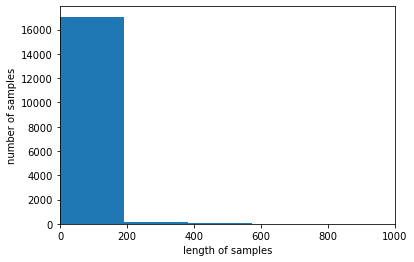

In [266]:
# 리뷰 길이 분포 확인
import matplotlib.pyplot as plt

plt.hist([len(s) for s in token_text], bins=10)
plt.xlim([0, 1000])
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [334]:
# 최종 전처리 데이터 확보


import pickle as pkl
with open(DATA_FOLDER_PATH + "fifa_data.pkl", "wb" ) as file:
    pkl.dump(train_ids, file)
    pkl.dump(att_mask, file)
    pkl.dump(df_fifa_days, file)
    pkl.dump(token_text, file)



### extended BERT 만들기

In [335]:
# BERT 모델 불러오기
from transformers import BertModel
model = BertModel.from_pretrained(model_version)

In [ ]:
# 불러온 모델에 Extended BERT 토크나이저 저장
#model.save_pretrained("./fifa/")
tokenizer.save_pretrained(DATA_FOLDER_PATH + "fifa/")